<a href="https://colab.research.google.com/github/jtwang1027/cancer_omics/blob/master/cell_line_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

exploring transcriptomic, copy number variant, and proteomic data

In [0]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


PCA to compare baseline starting points of different cell lines


In [0]:
def pca_plot(filename, catcol=None, dim_method='PCA' ,title='PCA'):
  ''' reads in csv file, standardizes data, and generates PCA plot ;
  catcol is the column to color the scatter plot by; title= plot title;
  dim_method: pca or tsne'''
  
  
  
  #reading in data and scaling
  df=pd.read_csv(filename)
  
  #for coloring plot
  if catcol is not None: #color column is supplied
    categories = np.unique(df[catcol])
    ncolors = np.linspace(0, 1, len(categories))
    colordict = dict(zip(categories, ncolors))  
    color = df[catcol].apply(lambda x: colordict[x])
  else:
    color= np.zeros(df.shape[0])
  
  
  df= df.select_dtypes(include='float64')
  df.dropna(axis=1, inplace=True)
  df_scaled = StandardScaler().fit_transform(df) # normalizing the features
  
  
  
  if dim_method=='PCA' or dim_method=='pca': #pca
    dr = PCA(n_components=2)
    print('using PCA')
  else: #t-sne
    print('using tsne')
    dr = TSNE(n_components=2)
    
    
  principalComponents = dr.fit_transform(df_scaled)

  pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
  
  ax=plt.figure()
  plt.figure(figsize=(4,4))
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=14)
  plt.xlabel('Component 1',fontsize=20)
  plt.ylabel('Component 2',fontsize=20)
  plt.title(title,fontsize=20)
  plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=color)
#   plt.legend(categories)
  return (None)

using PCA


<Figure size 432x288 with 0 Axes>

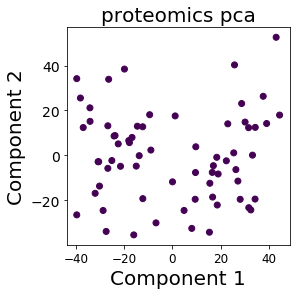

In [63]:
pca_plot('/content/drive/My Drive/proteomics_consolidated.csv',title='proteomics pca')

using tsne


<Figure size 432x288 with 0 Axes>

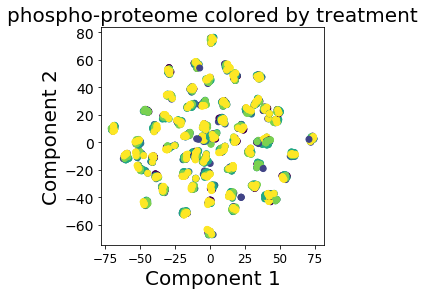

In [65]:
pca_plot('/content/drive/My Drive/median_phospho_data.csv', catcol='treatment', dim_method='tsne', title='phospho-proteome colored by treatment')

using tsne


<Figure size 432x288 with 0 Axes>

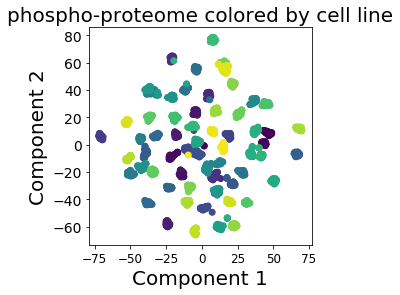

In [66]:
pca_plot('/content/drive/My Drive/median_phospho_data.csv', catcol='cell_line', dim_method='tsne', title='phospho-proteome colored by cell line')

using PCA


<Figure size 432x288 with 0 Axes>

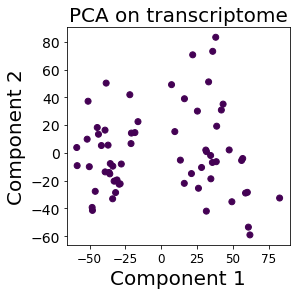

In [67]:
pca_plot('/content/drive/My Drive/rnaseqexononly_marcotte.csv',dim_method='pca',title='PCA on transcriptome')



There appear to be 2 clusters of cell lines based on the transcriptome.

In [0]:
tr=pd.read_csv('/content/drive/My Drive/rnaseqexononly_marcotte.csv')

In [0]:
cell_lines= tr['X']
tr= tr.select_dtypes(include='float64')
tr.dropna(axis=1, inplace=True)
tr_sc= StandardScaler().fit_transform(tr)
# tr_pca=PCA(n_components=5).fit_transform(tr_sc)

In [103]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(tr_sc)
kmeans.labels_

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int32)

Text(0.5, 1.0, 'Transcriptomics PCA with clustering')

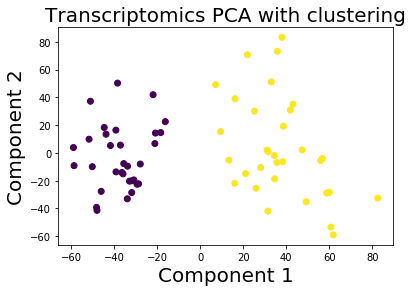

In [104]:
plt.scatter( tr_pca[:,0],tr_pca[:,1], c= kmeans.labels_)
plt.xlabel('Component 1',fontsize=20)
plt.ylabel('Component 2',fontsize=20)
plt.title("Transcriptomics PCA with clustering",fontsize=20)

how do these clusters localize in other omics data types?

In [0]:
#which cell lines belong to each cluster?
lclass=dict(zip(cell_lines, kmeans.labels_))

In [0]:
prot=pd.read_csv('/content/drive/My Drive/proteomics_consolidated.csv')

In [0]:
prot.rename(columns={'Unnamed: 0':'cell_line'}, inplace=True)

In [0]:
prot['line_class']=prot['cell_line'].map(lclass)

keep only cell lines that are in dict (and were clustered from the transcriptomic data)

In [0]:
keep=prot['cell_line'].isin(list(lclass.keys()))
prot=prot[keep]
# prot['cell_line'] in list(lclass.keys())

In [0]:
prot.to_csv('/content/drive/My Drive/proteomics_consol_cell-classes.csv')

using PCA


<Figure size 432x288 with 0 Axes>

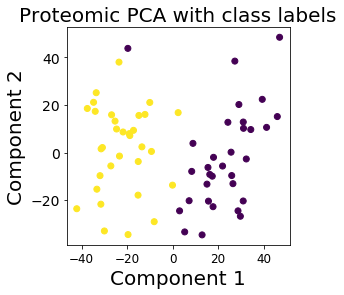

In [100]:
pca_plot('/content/drive/My Drive/proteomics_consol_cell-classes.csv', catcol='line_class',title='Proteomic PCA with class labels')

Classes assigned based on transcriptomic data, also show distinctions in proteomic data

In [0]:
pca_plot('/content/drive/My Drive/complete_cell_lines/184a1.csv',catcol='treatment')

In [18]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow 2.x selected.


KeyboardInterrupt: ignored

In [0]:
dir="/content/drive/My Drive/complete_cell_lines"
file_list=[]
for file in os.listdir(dir):
    if file.endswith(".csv"):
        file_list.append(os.path.join(dir, file))
print(file_list)

In [0]:
# #what columns are common to all data?
# col=set()
# for f in file_list:
#   curr=pd.read_csv(f, index_col=0, nrows=10)
#   curr.dropna(axis=1, inplace=True) 
#   curr=curr.columns.tolist()
#   curr=set(curr)
#   # print(f)
#   if col==set():
#     col=curr # set as baseline columns
#   else:
#     col.intersection(curr)
#     # print(f)
# col= list(col)

In [0]:
#which cell lines have treatment data
file_tr=[]
for f in file_list:
  curr=pd.read_csv(f, index_col=0, nrows=0).columns.tolist()
  # print(f)
  if 'treatment' in curr:
    file_tr.append(f)
file_tr

In [0]:
f

In [0]:
temp=pd.read_csv('/content/drive/My Drive/complete_cell_lines/zr7530.csv', nrows=0)
temp

In [0]:
'treatment' in temp.columns

In [0]:
'treatment' in temp.columns

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
def process(filenames, predictor= 'p.STAT5'):
  ''' input filename, downloads csv, preprocessing, minmaxscaling
  returns X and y for train/test/split ; predictor is the predictor column'''
  
  df=pd.DataFrame()
  for fi in filenames:
    temp= pd.read_csv(fi)
    df=pd.concat([df,temp],axis=0)
    
  df.dropna(axis=1, inplace=True)
  #should add in synchronization for treatment times
  
#   if 'treatment' in df.columns: # will likely get dropped, not in all datasets
  encoded1=pd.get_dummies(df.treatment, drop_first=True)
  df=df.join(encoded1)
#   if 'cell_line' in df.columns: #one hot encode cell line
#     print(f'# unique lines: {df.cell_line.unique()}')
  encoded2=pd.get_dummies(df['cell_line'], drop_first=False)
#     print(encoded2)
#     print('cell line encoded')
  df=df.join(encoded2)
  
  df=df.select_dtypes(include=['float64','uint8'])
  
#   predictor=df.columns[-1] #make it the last one
  
  print(f'predictor column: {predictor}')
  
  X= df.drop([predictor], axis=1)
  
  #scale remaining columns
  scaler=MinMaxScaler()
  X[X.columns]=scaler.fit_transform(X)

  
  
  y= df[predictor]

  return(X,y)

In [0]:
X,y= process(file_list[:2])

In [0]:
X.columns

In [0]:
temp=pd.concat([temp1,temp2], axis=0)
temp.columns

In [0]:
from tensorflow.python.keras.layers import Dense, BatchNormalization
from tensorflow.python.keras import Sequential
import tensorflow.python.keras
from sklearn.model_selection import train_test_split



In [0]:
 def build_model():
  model = Sequential([
    Dense(24, activation='relu', input_shape=[len(X.columns)]),
    Dense(12, activation='relu'),
    BatchNormalization(),
    Dense(12, activation='relu'),
    Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model=build_model()

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state=1234)

In [0]:
X_train

In [0]:
EPOCHS = 1
# batch_size= 
# with tf.device('/device:GPU:0'):
history=model.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=2)#, callbacks=[ tfdocs.modeling.EpochDots() ])


In [0]:
#test set performance (from same cell lines)
test_predictions=model.predict(X_test)
rms = sqrt(mean_squared_error(test_predictions, y_test))
rms

